In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



orders = pd.read_csv('D:\Data Science\olist_orders_dataset.csv')
order_payments = pd.read_csv('D:\Data Science\olist_order_payments_dataset.csv')
customers = pd.read_csv('D:\Data Science\olist_customers_dataset.csv')
order_items = pd.read_csv('D:\Data Science\olist_order_items_dataset.csv')
order_reviews = pd.read_csv('D:\Data Science\olist_order_reviews_dataset.csv')

In [2]:
order_items = order_items[(order_items.order_item_id == 1)]
order_items = pd.merge(order_items, order_reviews, on='order_id')
order_items = pd.merge(order_items, orders, on='order_id')
order_items = pd.merge(order_items, customers, on='customer_id')

In [3]:
cols = ['customer_unique_id', 'product_id', 'review_score']
dataset = order_items[cols]
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99222 entries, 0 to 99221
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  99222 non-null  object
 1   product_id          99222 non-null  object
 2   review_score        99222 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


,customer_unique_id,product_id,review_score
0,871766c5855e863f6eccc05f988b23cb,4244733e06e7ecb4970a6e2683c13e61,5
1,eb28e67c4c0b83846050ddfb8a35d051,e5f2d52b802189ee658865ca93d83a8f,4
2,3818d81c6709e39d06b2738a8d3a2474,c777355d18b72b67abbeef9df44fd0fd,5
3,af861d436cfc08b2c2ddefd0ba074622,7634da152a4610f1595efa32f14722fc,4
4,64b576fb70d441e8f1b2d7d446e483c5,ac6c3623068f30de03045865e4e10089,5


In [4]:
reviews_count = pd.DataFrame(dataset.groupby('customer_unique_id')['review_score'].count())
reviews_count.review_score.value_counts()

1     92423
2      2437
3       393
4       125
5        24
6        11
7         5
16        1
9         1
Name: review_score, dtype: int64

In [5]:
reviews_count = reviews_count[reviews_count['review_score'] > 1]
reviews_count.info()
reviews_count.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2997 entries, 000bfa1d2f1a41876493be685390d6d3 to ffe254cc039740e17dd15a5305035928
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   review_score  2997 non-null   int64
dtypes: int64(1)
memory usage: 46.8+ KB


,review_score
customer_unique_id,
000bfa1d2f1a41876493be685390d6d3,2
004288347e5e88a27ded2bb23747066c,2
004b45ec5c64187465168251cd1c9c2f,2
0058f300f57d7b93c477a131a59b36c3,2
00a39521eb40f7012db50455bf083460,2


In [6]:

dataset = pd.merge(reviews_count, dataset, on='customer_unique_id')
cols = ['customer_unique_id', 'product_id', 'review_score_y']
dataset = dataset[cols]
dataset.info()
dataset.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6799 entries, 0 to 6798
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  6799 non-null   object
 1   product_id          6799 non-null   object
 2   review_score_y      6799 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 212.5+ KB


,customer_unique_id,product_id,review_score_y
0,000bfa1d2f1a41876493be685390d6d3,bb15f9ba2ec6e36ab6c9e88d17430d64,5
1,000bfa1d2f1a41876493be685390d6d3,bb15f9ba2ec6e36ab6c9e88d17430d64,4
2,004288347e5e88a27ded2bb23747066c,a2bd2eae20998a24c22b110334928b02,5
3,004288347e5e88a27ded2bb23747066c,6e1b14d3cbb5fb3a2c00351007127dfd,5
4,004b45ec5c64187465168251cd1c9c2f,b0961721fd839e9982420e807758a2a6,1
5,004b45ec5c64187465168251cd1c9c2f,a6ad77b15e566298a4e8ee2011ab1255,5
6,0058f300f57d7b93c477a131a59b36c3,6bd248f93425ceeb625a8a97e2404112,1
7,0058f300f57d7b93c477a131a59b36c3,4630761de87581e8b659dc77bb7eb4ee,5
8,00a39521eb40f7012db50455bf083460,a42d9c825894f96fc6ed02610891454d,4
9,00a39521eb40f7012db50455bf083460,f89cd865cac300a9bf1320dd8f0fa223,4


# KNN Algorithm

In [22]:
import io
from surprise import KNNBaseline, KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1,5))
dataset_ecommerce = Dataset.load_from_df(dataset[['customer_unique_id', 'product_id', 'review_score_y']], reader)
trainset, testset = train_test_split(dataset_ecommerce, test_size=.25)
sim_options = {'name': 'cosine', 'user_based': True, 'min_support': 1}
algo = KNNWithMeans(sim_options=sim_options)
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


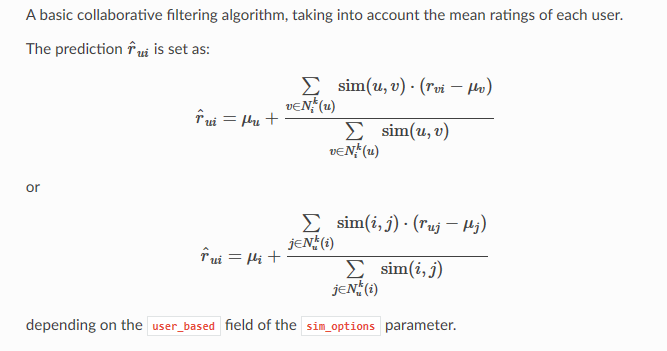

In [23]:
predictions = algo.test(testset, verbose = False)

In [24]:
trainset.n_users

2835

In [25]:
def get_Iu(uid):
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:
        return 0
    
    
def get_Ui(iid):
     try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
     except ValueError:
        return 0


df = pd.DataFrame(predictions, columns=['uid','iid','rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu) #number of items reviewed by given user
df['Ui'] = df.iid.apply(get_Ui) #number of users that have reviewed given item
df['err'] = abs(df.est - df.rui)

In [26]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,d0145502f422d4a9387f75186674f29a,0c859e9bb0591751e168d476ab0bb6e1,4.0,4.121592,"{'was_impossible': True, 'reason': 'User and/o...",1,0,0.121592
1,cef29e793e232d30250331804cdb7000,060965aa6dfa817b80abda0c9413cc77,5.0,4.121592,"{'was_impossible': True, 'reason': 'User and/o...",1,0,0.878408
2,3aa71d539bb760f054b280604391602a,4b6b3a7072d549354c3743dedbf4170a,5.0,4.121592,"{'was_impossible': True, 'reason': 'User and/o...",1,0,0.878408
3,3e43e6105506432c953e165fb2acf44c,957f6d6b55b78746f89e976cba785440,4.0,2.571429,"{'actual_k': 0, 'was_impossible': False}",7,1,1.428571
4,c17526359e1068290ebf7dd22a856de7,853ece231e7141c4e815d687c68c6b7d,5.0,4.121592,"{'was_impossible': True, 'reason': 'User and/o...",1,0,0.878408


In [27]:
df.err.mean()

0.891158446370583

In [28]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [29]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
1170,2b0d2a4ffe3906cd18019c2463cfeee9,4c77d14c542fcd857dddc3df2e82329c,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,1,0.0
1024,f804ed90360900357b6db9d7635d275d,5f21301936c11698db6aee5444190da0,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",1,1,0.0
370,5b8a75e77489899ad9e6d57273aafd7f,9fc0c73ce4d0eaaead44e81eeefebeb0,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",2,1,0.0
367,e8569c57efe3adf347b3e92ec04d1f91,7c1bd920dbdf22470b68bde975dd3ccf,5.0,5.0,"{'actual_k': 3, 'was_impossible': False}",2,26,0.0
366,ac78e99ad54cdae633e5dd5d10eef34a,47cd48073d67f91f09cb5ef9496c920b,5.0,5.0,"{'actual_k': 4, 'was_impossible': False}",1,4,0.0
364,9cc5a07f169a1606fd347a56683e6ea6,24c66f106f642621e524291a895c9032,5.0,5.0,"{'actual_k': 2, 'was_impossible': False}",3,2,0.0
363,80e73006367ee828a4f5c2531aa222e1,0820af09ddc75b84841b1fab4da4be9b,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,1,0.0
362,7ad04c71bfca958e6f2ec44bce34e2da,3e9fecd898d8fc598fb18399c2af0248,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,1,0.0
360,76a0491dd70c125840fa259f00dfc351,422879e10f46682990de24d770e7f83d,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,16,0.0
1033,c4cf9b10d2668bfabb498d93004ab4a0,5131368354b35ed441caa8ca27244f16,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,1,0.0


In [30]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
1226,987fadd385777d8f27edac709bc9fb61,f56e93f8bec270456dd5ec3272bd42f3,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",1,1,4.0
867,fe81bb32c243a86b2f86fbf053fe6140,e2bb00220a167d9e60b6776ac33717bc,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",4,1,4.0
268,217394922e43c19740ea4464e63ca8e0,efb23bb2d728864f9d7d3cdad802ca87,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,1,4.0
1060,bce006e903be688f122a39f45b210090,99f5b2240b82bf9387e5cf2fc0335b08,5.0,1.0,"{'actual_k': 0, 'was_impossible': False}",1,6,4.0
1397,dbd74164682e2397d489169439362184,41801d2ed5124923137ec39aeeea1e93,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",2,1,4.0
473,d05fdf65460ea1bf8735cd5843c3d97d,1612209b0b37fbe80e1e8e1b7d19ca1d,5.0,1.0,"{'actual_k': 0, 'was_impossible': False}",1,2,4.0
269,ae11ab40faeb1f8b85f6308e052bd710,f40876e0ef3cd5f9132b1f16b04b1346,1.0,5.0,"{'actual_k': 3, 'was_impossible': False}",1,3,4.0
162,efd22f5f8fc7e5035a4f48bd92c0c69c,6803077179d24889430188e03fafd31a,5.0,1.0,"{'actual_k': 0, 'was_impossible': False}",1,2,4.0
1355,1da09dd64e235e7c2f29a4faff33535c,bb90206fa281c20f0b4c42a2393b54dd,5.0,1.0,"{'actual_k': 0, 'was_impossible': False}",1,1,4.0
1113,72061fff095d8325b311ea24e2f4a2b5,704ef63ad0ac345842ea734060a83db2,1.0,5.0,"{'actual_k': 0, 'was_impossible': False}",1,1,4.0


In [31]:
df.Ui.value_counts()

0     864
1     381
2     155
3      86
4      41
6      27
42     21
7      18
5      17
24     16
8      13
26     10
16      8
19      8
18      7
20      7
33      6
25      5
11      3
9       3
14      2
10      2
Name: Ui, dtype: int64

In [32]:
df.Iu.value_counts()

1     1035
0      329
2      247
3       55
4       21
5        6
12       4
7        2
6        1
Name: Iu, dtype: int64

In [33]:
from surprise import accuracy
predictions = algo.test(testset)
test = accuracy.rmse(predictions) #root mean squared error

RMSE: 1.3104


In [34]:
test = accuracy.mae(predictions) #Mean absolute Error

MAE:  0.8912


# KNN Algorithm (Movielens Database)

In [ ]:
import io
from surprise import KNNBaseline, KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1,5))
dataset_movielens = Dataset.load_builtin('ml-100k')
trainset = dataset_movielens.build_full_trainset()
#trainset, testset = train_test_split(dataset_surprise, test_size=.25)
sim_options = {'name': 'cosine', 'user_based': True, 'min_support': 5}
algo = KNNWithMeans(sim_options=sim_options)
algo.fit(trainset)
trainset = algo.trainset

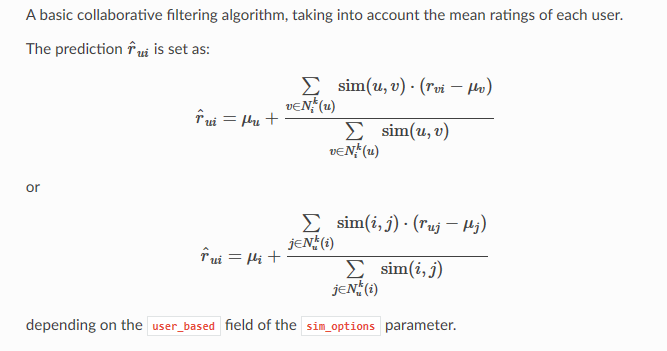

In [ ]:
testset = trainset.build_testset() #all the ratings in the trainset

In [ ]:
predictions = algo.test(testset, verbose = False)

In [ ]:
trainset.n_users

In [ ]:
def get_Iu(uid):
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:
        return 0
    
    
def get_Ui(iid):
     try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
     except ValueError:
        return 0


df_movielens = pd.DataFrame(predictions, columns=['uid','iid','rui', 'est', 'details'])
df_movielens['Iu'] = df_movielens.uid.apply(get_Iu) #number of items reviewed by given user
df_movielens['Ui'] = df_movielens.iid.apply(get_Ui) #number of users that have reviewed given item
df_movielens['err'] = abs(df_movielens.est - df_movielens.rui)

In [ ]:
df_movielens.head()

In [ ]:
df_movielens.err.mean()

In [ ]:
best_predictions = df_movielens.sort_values(by='err')[:10]
worst_predictions = df_movielens.sort_values(by='err')[-10:]

In [ ]:
best_predictions

In [ ]:
worst_predictions

In [ ]:
df_movielens.Ui.value_counts()

In [ ]:
df_movielens.Iu.value_counts()

In [ ]:
from surprise import accuracy
test = accuracy.rmse(predictions) #root mean squared error

In [ ]:
test = accuracy.mae(predictions) #Mean absolute Error

# Vergleich beider Datensets

In [ ]:
dataset.head()

In [ ]:
dataset['review_score_y'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

figure, (ax1, ax2) = plt.subplots(1, 2)

df.est.plot(kind='hist', title = 'KNN (Olist)', ax = ax1)
df_movielens.est.plot(kind='hist', title = 'KNN (Movielens)', ax = ax2)

# GridSearchCV (Parameter)

In [ ]:
from surprise.model_selection import GridSearchCV

sim_options = {"name": ["msd", "cosine"], "min_support": [1,2,3,4,5], "user_based": [False, True]}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(dataset_ecommerce)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

In [ ]:
from surprise.model_selection import GridSearchCV

sim_options = {"name": ["msd", "cosine"], "min_support": [1,2,3,4,5], "user_based": [False, True]}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(dataset_movielens)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

# KNN with Means (Movielens) + Anti_testset

In [ ]:
import io
from surprise import KNNBaseline, KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1,5))
dataset_movielens = Dataset.load_builtin('ml-100k')
trainset = dataset_movielens.build_full_trainset()
#trainset, testset = train_test_split(dataset_surprise, test_size=.25)
sim_options = {'name': 'cosine', 'user_based': True, 'min_support': 5}
algo = KNNWithMeans(sim_options=sim_options)
algo.fit(trainset)
trainset = algo.trainset

In [ ]:
testset = trainset.build_anti_testset() #all the ratings in the trainset

In [ ]:
predictions = algo.test(testset, verbose = False)

# KNN Algorithm (with Cross-validation)

In [ ]:
import io
from surprise import KNNBaseline, KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(1,5))
dataset_ecommerce = Dataset.load_from_df(dataset[['customer_unique_id', 'product_id', 'review_score_y']], reader)
#trainset = dataset_ecommerce.build_full_trainset()
#trainset, testset = train_test_split(dataset_surprise, test_size=.25)
sim_options = {'name': 'cosine', 'user_based': True, 'min_support': 1}
algo = KNNWithMeans(sim_options=sim_options)

cross_validate(algo, dataset_ecommerce, measures=['RMSE', 'MAE'], cv=5, verbose=True)
#algo.fit(trainset)
#trainset = algo.trainset

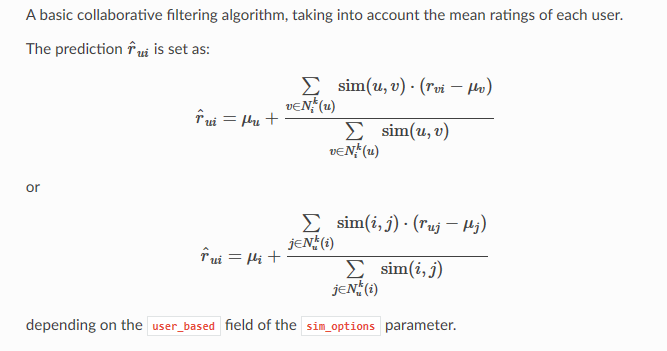

# KNN Algorithm (Full Trainset vs. Split_Trainset_Testset)

In [ ]:
import io
from surprise import KNNBaseline, KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import split
from surprise.model_selection import KFold

reader = Reader(rating_scale=(1,5))
dataset_ecommerce = Dataset.load_from_df(dataset[['customer_unique_id', 'product_id', 'review_score_y']], reader)
sim_options = {'name': 'cosine', 'user_based': True, 'min_support': 1}
algo = KNNWithMeans(sim_options=sim_options)

kf = KFold(n_splits=3)

for trainset, testset in kf.split(dataset_ecommerce):
    algo.fit(trainset)
    predictions = algo.test(testset)
    accuracy.rmse(predictions, verbose=True)

In [ ]:
from surprise.model_selection import GridSearchCV

sim_options = {"name": ["msd", "cosine"], "min_support": [1,2], "user_based": [False, True]}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(dataset_ecommerce)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

algo = gs.best_estimator['rmse']
trainset = dataset_ecommerce.build_full_trainset() #Do not split the dataset into folds and just return a trainset as is, built from the wohle dataset.
algo.fit(trainset)

In [ ]:
testset = trainset.build_testset()

In [ ]:
predictions = algo.test(testset, verbose = False)

In [ ]:
def get_Iu(uid):
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:
        return 0
    
    
def get_Ui(iid):
     try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
     except ValueError:
        return 0


df = pd.DataFrame(predictions, columns=['uid','iid','rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu) #number of items reviewed by given user
df['Ui'] = df.iid.apply(get_Ui) #number of users that have reviewed given item
df['err'] = abs(df.est - df.rui)

In [ ]:
df.head()

In [ ]:
df.err.mean()

In [ ]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [ ]:
best_predictions

In [ ]:
trainset, testset = train_test_split(dataset_ecommerce, test_size=.25)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

# KNN Algorithm (Basic; E-Commerce)

In [ ]:
import io
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [ ]:

reader = Reader(rating_scale=(1,5))
dataset_ecommerce = Dataset.load_from_df(dataset[['customer_unique_id', 'product_id', 'review_score_y']], reader)

GridSearchCV -> find best parameters

In [ ]:
sim_options = {"name": ["msd", "cosine"], "min_support": [1,2,3], "user_based": [False, True]}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNBasic, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(dataset_ecommerce)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

print(gs.best_score["mae"])
print(gs.best_params["mae"])

In [ ]:
trainset, testset = train_test_split(dataset_ecommerce, test_size=.25)
sim_options = {'name': 'cosine', 'user_based': True, 'min_support': 1}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

In [ ]:
predictions = algo.test(testset, verbose = False)

In [ ]:
trainset.n_users

In [ ]:
def get_Iu(uid):
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:
        return 0
    
    
def get_Ui(iid):
     try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
     except ValueError:
        return 0


df = pd.DataFrame(predictions, columns=['uid','iid','rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu) #number of items reviewed by given user
df['Ui'] = df.iid.apply(get_Ui) #number of users that have reviewed given item
df['err'] = abs(df.est - df.rui)

In [ ]:
df.head()

In [ ]:
df.err.mean()

In [ ]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [ ]:
best_predictions

In [ ]:
worst_predictions

In [ ]:
df.Ui.value_counts()

In [ ]:
df.Iu.value_counts()

In [ ]:
from surprise import accuracy
predictions = algo.test(testset)
test = accuracy.rmse(predictions) #root mean squared error

In [ ]:
test = accuracy.mae(predictions) #Mean absolute Error

# KNN Algorithm (ZScore; E-Commerce)

In [ ]:
import io
from surprise import KNNWithZScore
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [ ]:
reader = Reader(rating_scale=(1,5))
dataset_ecommerce = Dataset.load_from_df(dataset[['customer_unique_id', 'product_id', 'review_score_y']], reader)

GridSearchCV -> find best parameters

In [ ]:
sim_options = {"name": ["msd", "cosine"], "min_support": [1,2,3], "user_based": [False, True]}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithZScore, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(dataset_ecommerce)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

print(gs.best_score["mae"])
print(gs.best_params["mae"])

In [ ]:
trainset, testset = train_test_split(dataset_ecommerce, test_size=.25)
sim_options = {'name': 'cosine', 'user_based': True, 'min_support': 1}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

In [ ]:
predictions = algo.test(testset, verbose = False)

In [ ]:
trainset.n_users

In [ ]:
def get_Iu(uid):
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:
        return 0
    
    
def get_Ui(iid):
     try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
     except ValueError:
        return 0


df = pd.DataFrame(predictions, columns=['uid','iid','rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu) #number of items reviewed by given user
df['Ui'] = df.iid.apply(get_Ui) #number of users that have reviewed given item
df['err'] = abs(df.est - df.rui)

In [ ]:
df.head()

In [ ]:
df.err.mean()

In [ ]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [ ]:
best_predictions

In [ ]:
worst_predictions

In [ ]:
df.Ui.value_counts()

In [ ]:
df.Iu.value_counts()

In [ ]:
from surprise import accuracy
predictions = algo.test(testset)
test = accuracy.rmse(predictions) #root mean squared error

In [ ]:
test = accuracy.mae(predictions) #Mean absolute Error

# KNN Algorithm (Baseline; E-Commerce)

In [ ]:
import io
from surprise import KNNBaseline
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [ ]:
reader = Reader(rating_scale=(1,5))
dataset_ecommerce = Dataset.load_from_df(dataset[['customer_unique_id', 'product_id', 'review_score_y']], reader)

GridSearchCV -> find best parameters

In [ ]:
sim_options = {"name": ["msd", "cosine"], "min_support": [1,2,3], "user_based": [False, True]}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNBaseline, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(dataset_ecommerce)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

print(gs.best_score["mae"])
print(gs.best_params["mae"])

In [ ]:
trainset, testset = train_test_split(dataset_ecommerce, test_size=.25)
sim_options = {'name': 'cosine', 'user_based': False, 'min_support': 1}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

In [ ]:
predictions = algo.test(testset, verbose = False)

In [ ]:
trainset.n_users

In [ ]:
def get_Iu(uid):
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:
        return 0
    
    
def get_Ui(iid):
     try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
     except ValueError:
        return 0


df = pd.DataFrame(predictions, columns=['uid','iid','rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu) #number of items reviewed by given user
df['Ui'] = df.iid.apply(get_Ui) #number of users that have reviewed given item
df['err'] = abs(df.est - df.rui)

In [ ]:
df.head()

In [ ]:
df.err.mean()

In [ ]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [ ]:
best_predictions

In [ ]:
worst_predictions

In [ ]:
df.Ui.value_counts()

In [ ]:
df.Iu.value_counts()

In [ ]:
from surprise import accuracy
predictions = algo.test(testset)
test = accuracy.rmse(predictions) #root mean squared error

In [ ]:
test = accuracy.mae(predictions) #Mean absolute Error